[1 1 1 ... 2 0 0]
cluster_centers: [[ 0.95599367 -0.91612234]
 [ 0.99957414  0.89275465]
 [-0.95425416 -1.01960393]]
number of estimated clusters : 3


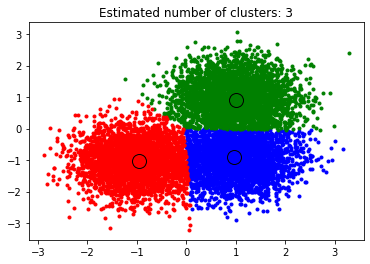

In [2]:
# -*- coding:utf-8 -*-
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  ##python自带的迭代器模块


##产生随机数据的中心
centers = [[1, 1], [-1, -1], [1, -1]]
##产生的数据个数
n_samples=10000
##生产数据
X, _ = make_blobs(n_samples=n_samples, centers= centers, cluster_std=0.6,
                  random_state =0)

##带宽，也就是以某个点为核心时的搜索半径
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
##设置均值偏移函数
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
##训练数据
ms.fit(X)
##每个点的标签
labels = ms.labels_
print(labels)
##簇中心的点的集合
cluster_centers = ms.cluster_centers_
print('cluster_centers:',cluster_centers)
##总共的标签分类
labels_unique = np.unique(labels)
##聚簇的个数，即分类的个数
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)


##绘图
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    ##根据lables中的值是否等于k，重新组成一个True、False的数组
    my_members = labels == k
    cluster_center = cluster_centers[k]
    ##X[my_members, 0] 取出my_members对应位置为True的值的横坐标
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

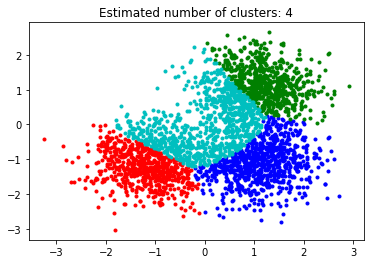

In [3]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import spectral_clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from itertools import cycle  ##python自带的迭代器模块

##产生随机数据的中心
centers = [[1, 1], [-1, -1], [1, -1]]
##产生的数据个数
n_samples=3000
##生产数据
X, lables_true = make_blobs(n_samples=n_samples, centers= centers, cluster_std=0.6, 
                  random_state =0)

##变换成矩阵，输入必须是对称矩阵
metrics_metrix = (-1 * metrics.pairwise.pairwise_distances(X)).astype(np.int32)
metrics_metrix += -1 * metrics_metrix.min()
##设置谱聚类函数
n_clusters_= 4
lables = spectral_clustering(metrics_metrix,n_clusters=n_clusters_)

##绘图
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    ##根据lables中的值是否等于k，重新组成一个True、False的数组
    my_members = lables == k
    ##X[my_members, 0] 取出my_members对应位置为True的值的横坐标
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# DBSCAN算法函数

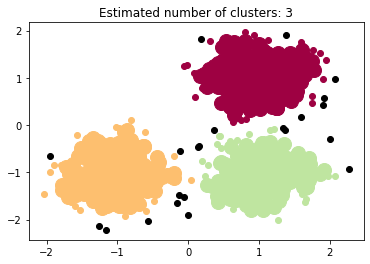

In [5]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  ##python自带的迭代器模块
from sklearn.preprocessing import StandardScaler

##产生随机数据的中心
centers = [[1, 1], [-1, -1], [1, -1]]
##产生的数据个数
n_samples=750
##生产数据:此实验结果受cluster_std的影响，或者说受eps 和cluster_std差值影响
X, lables_true = make_blobs(n_samples=n_samples, centers= centers, cluster_std=0.4, 
                  random_state =0)


##设置分层聚类函数
db = DBSCAN(eps=0.3, min_samples=10)
##训练数据
db.fit(X)
##初始化一个全是False的bool类型的数组
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
'''
   这里是关键点(针对这行代码：xy = X[class_member_mask & ~core_samples_mask])：
   db.core_sample_indices_  表示的是某个点在寻找核心点集合的过程中暂时被标为噪声点的点(即周围点
   小于min_samples)，并不是最终的噪声点。在对核心点进行联通的过程中，这部分点会被进行重新归类(即标签
   并不会是表示噪声点的-1)，也可也这样理解，这些点不适合做核心点，但是会被包含在某个核心点的范围之内
'''
core_samples_mask[db.core_sample_indices_] = True

##每个数据的分类
lables = db.labels_

##分类个数：lables中包含-1，表示噪声点
n_clusters_ =len(np.unique(lables)) - (1 if -1 in lables else 0)

##绘图
unique_labels = set(lables)
'''
   1)np.linspace 返回[0,1]之间的len(unique_labels) 个数
   2)plt.cm 一个颜色映射模块
   3)生成的每个colors包含4个值，分别是rgba
   4)其实这行代码的意思就是生成4个可以和光谱对应的颜色值
'''
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(1)
plt.clf()


for k, col in zip(unique_labels, colors):
    ##-1表示噪声点,这里的k表示黑色
    if k == -1:
        col = 'k'

    ##生成一个True、False数组，lables == k 的设置成True
    class_member_mask = (lables == k)
    
    ##两个数组做&运算，找出即是核心点又等于分类k的值  markeredgecolor='k',
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', c=col,markersize=14)
    '''
       1)~优先级最高，按位对core_samples_mask 求反，求出的是噪音点的位置
       2)& 于运算之后，求出虽然刚开始是噪音点的位置，但是重新归类却属于k的点
       3)对核心分类之后进行的扩展
    '''
    xy = X[class_member_mask & ~core_samples_mask]     
    plt.plot(xy[:, 0], xy[:, 1], 'o', c=col,markersize=6)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()